In [40]:
# packages
import pandas as pd
import geopandas as gpd


In [41]:
# import xlsx file to a pandas dataframe
overdose_data = pd.read_excel('./data/HepVu_County_Opioid_Indicators_05DEC22.xlsx')

In [42]:
overdose_data

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
0,1001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6
1,1003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4
2,1005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6
3,1007,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3
4,1009,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2
...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,PR,Vega Baja Munic,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3217,72147,PR,Vieques Municip,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3218,72149,PR,Villalba Munici,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3219,72151,PR,Yabucoa Municip,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [43]:
# convert GEOID to string
overdose_data['GEO ID'] = overdose_data['GEO ID'].astype(str)

In [44]:
# in df GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
overdose_data['GEO ID'] = overdose_data['GEO ID'].apply(lambda x: x.zfill(5))

In [45]:
overdose_data

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
0,01001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6
1,01003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4
2,01005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6
3,01007,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3
4,01009,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2
...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,PR,Vega Baja Munic,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3217,72147,PR,Vieques Municip,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3218,72149,PR,Villalba Munici,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
3219,72151,PR,Yabucoa Municip,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0


In [46]:
# load geospatial data
counties_2020 = gpd.read_file('./data/maps/tl_2020_us_county/tl_2020_us_county.shp')
counties_2023 = gpd.read_file('./data/maps/tl_2023_us_county/tl_2023_us_county.shp')

In [47]:
# in counties_2023, and counties_2020 df GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
counties_2023['GEOID'] = counties_2023['GEOID'].apply(lambda x: x.zfill(5))
counties_2020['GEOID'] = counties_2020['GEOID'].apply(lambda x: x.zfill(5))

In [48]:
counties_2020.shape

(3234, 18)

In [49]:
counties_2023.shape

(3235, 19)

In [50]:
counties_2020

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,NaN,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,NaN,NaN,NaN,A,1103886631,12283371,+34.6905055,-084.4546244,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3230,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,NaN,NaN,NaN,A,4329730563,16913419,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3231,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,NaN,A,1850178949,71697237,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707..."
3232,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,NaN,13700,NaN,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


In [51]:
# match the GEOID column in the df with the GEOID column in the geospatial data and get the similar row count
overdose_data['GEO ID'].isin(counties_2020['GEOID']).value_counts()

GEO ID
True    3221
Name: count, dtype: int64

In [52]:
overdose_data['GEO ID'].isin(counties_2023['GEOID']).value_counts()

GEO ID
True     3213
False       8
Name: count, dtype: int64

In [53]:
# get the unmatched GEOID rows
overdose_data[~overdose_data['GEO ID'].isin(counties_2023['GEOID'])]

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
309,09001,CT,Fairfield Count,33.7,11.1,14.7,18.6,18.1,19.2,20.1,24.6
310,09003,CT,Hartford County,39.0,17.8,23.0,29.7,34.4,32.8,37.3,42.2
311,09005,CT,Litchfield Coun,22.8,26.9,28.4,24.1,30.1,39.6,38.6,42.9
312,09007,CT,Middlesex Count,26.2,20.3,23.5,28.0,28.6,35.9,30.0,36.3
313,09009,CT,New Haven Count,48.9,17.6,24.7,29.5,34.2,30.5,39.7,46.4
314,09011,CT,New London Coun,35.4,21.1,27.3,34.7,32.9,35.0,41.1,41.6
315,09013,CT,Tolland County,17.8,16.7,16.1,22.6,27.4,23.3,22.2,31.8
316,09015,CT,Windham County,28.4,25.5,27.5,29.9,35.5,32.4,42.2,41.0


In [55]:
# Add a column to the overdose_data df that contains geometry data. This should be filled with the geometry data from the counties_2020 df by matching the GEOID column in the overdose_data df with the GEOID column in the counties_2020 df.
overdose_data = overdose_data.merge(counties_2020[['GEOID', 'geometry']], left_on='GEO ID', right_on='GEOID', how='left')

In [56]:
overdose_data

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020,GEOID,geometry
0,01001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6,01001,"POLYGON ((-86.90310 32.54063, -86.90311 32.540..."
1,01003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4,01003,"POLYGON ((-87.99068 30.55549, -87.99051 30.560..."
2,01005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6,01005,"POLYGON ((-85.42982 32.04598, -85.42985 32.046..."
3,01007,AL,Bibb County,24.8,17.2,16.6,22.6,21.7,23.1,19.4,27.3,01007,"POLYGON ((-87.31226 33.08622, -87.31218 33.087..."
4,01009,AL,Blount County,22.8,18.6,18.9,22.7,27.0,19.9,20.3,24.2,01009,"POLYGON ((-86.74919 33.99760, -86.74902 33.997..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,PR,Vega Baja Munic,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,72145,"POLYGON ((-66.44042 18.42966, -66.44044 18.429..."
3217,72147,PR,Vieques Municip,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,72147,"POLYGON ((-65.63097 18.12302, -65.63095 18.123..."
3218,72149,PR,Villalba Munici,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,72149,"POLYGON ((-66.52542 18.11569, -66.52550 18.115..."
3219,72151,PR,Yabucoa Municip,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,72151,"POLYGON ((-65.94291 18.08924, -65.94273 18.089..."


In [58]:
# get the minimum and maximum values of the 'Narcotic Overdose Mortality Rate 2014' column
overdose_data['Narcotic Overdose Mortality Rate 2014'].min()
overdose_data['Narcotic Overdose Mortality Rate 2014'].max()


87.9

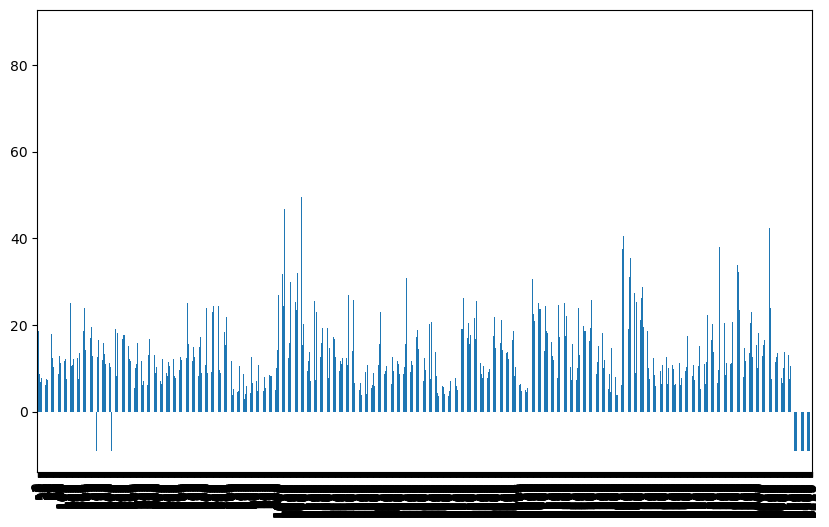

In [62]:
# plot a bar chart of the 'Narcotic Overdose Mortality Rate 2014' column using matplotlib

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
overdose_data['Narcotic Overdose Mortality Rate 2014'].plot(kind='bar', ax=ax)
plt.show()



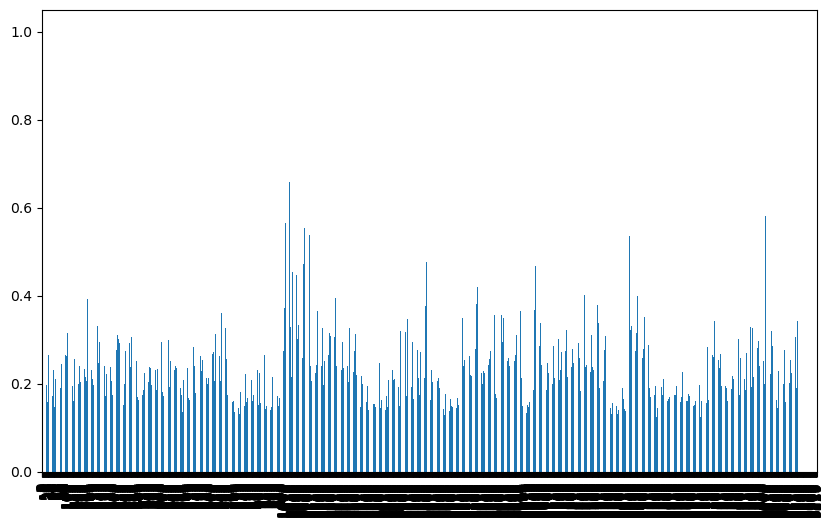

In [67]:
# make new column using Narcotic Overdose Mortality Rate 2014, normalized the values in the column, and plot a bar chart of the new column using matplotlib
overdose_data['Narcotic Overdose Mortality Rate 2014 Normalized'] = (overdose_data['Narcotic Overdose Mortality Rate 2014'] - overdose_data['Narcotic Overdose Mortality Rate 2014'].min()) / (overdose_data['Narcotic Overdose Mortality Rate 2014'].max() - overdose_data['Narcotic Overdose Mortality Rate 2014'].min())

fig, ax = plt.subplots(figsize=(10, 6))
overdose_data['Narcotic Overdose Mortality Rate 2014 Normalized'].plot(kind='bar', ax=ax)

plt.show()

In [88]:
# make this df a geospatial df
overdose_data = gpd.GeoDataFrame(overdose_data, geometry='geometry')

In [89]:
overdose_data_wy = overdose_data[overdose_data['State Abbreviation'] == 'WY']

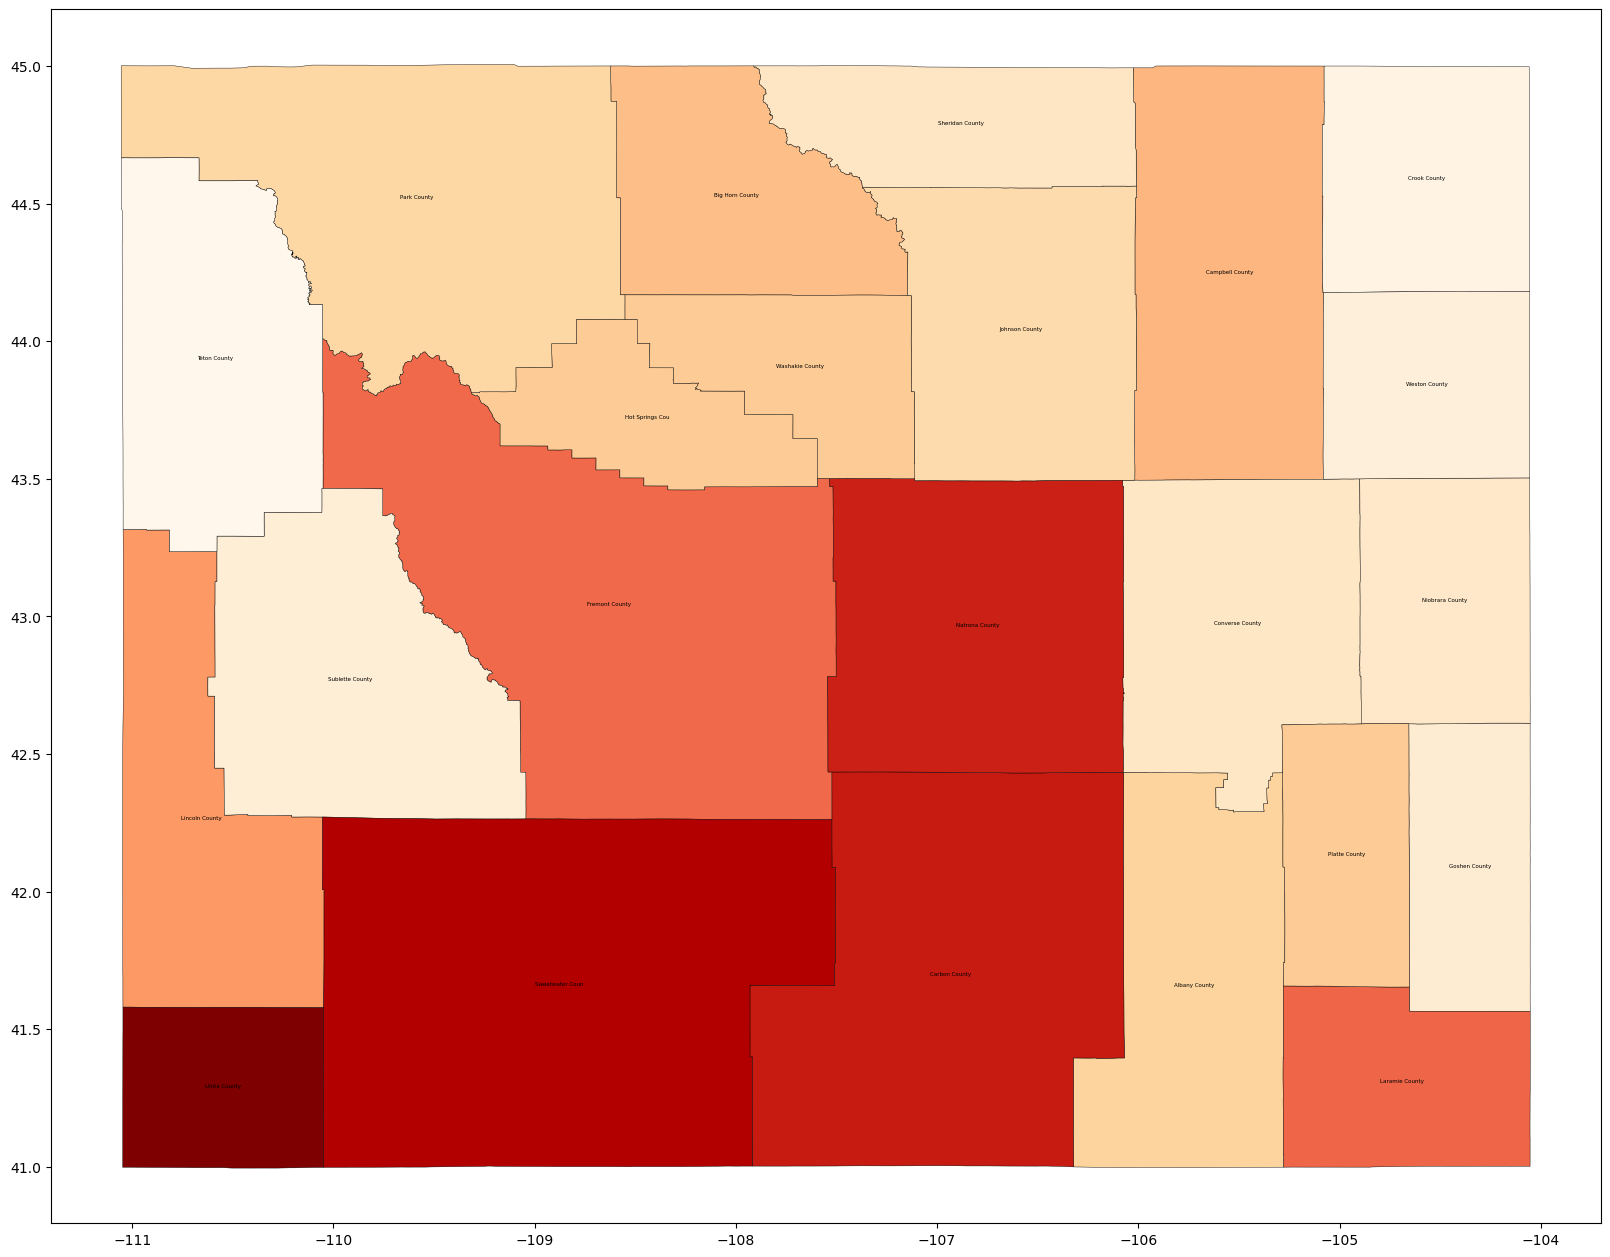

In [90]:
ax = overdose_data_wy.plot(figsize=(20, 20), column="Narcotic Overdose Mortality Rate 2014", legend=False, cmap='OrRd', edgecolor='black',linewidth=0.3)

for idx, row in overdose_data_wy.iterrows():
    centroid = row.geometry.centroid
    county_name = row['County Name']
    ax.annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=4)

# Display the plot
plt.show()

# filter the overdose_data df to only include rows where Narcotic Overdose Mortality Rate 2014 is over 75th percentile


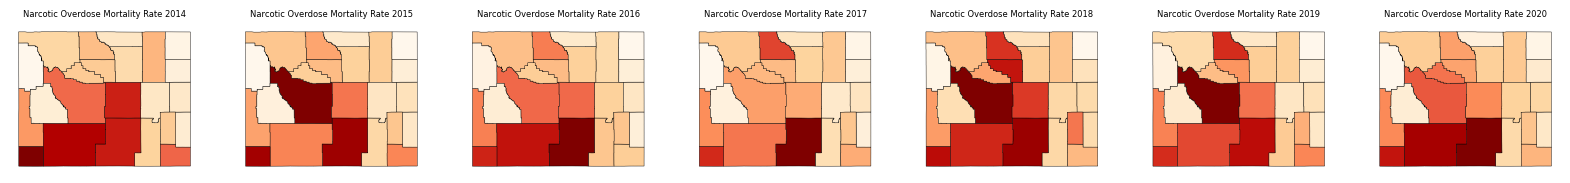

In [97]:
# plot above plot for Narcotic Overdose Mortality Rate 2014, Narcotic Overdose Mortality Rate 2015, Narcotic Overdose Mortality Rate 2016, Narcotic Overdose Mortality Rate 2017, Narcotic Overdose Mortality Rate 2018, Narcotic Overdose Mortality Rate 2019, and Narcotic Overdose Mortality Rate 2020
fig, ax = plt.subplots(1, 7, figsize=(20, 20))

for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(column=f'Narcotic Overdose Mortality Rate {year}', legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=6)
    ax.flatten()[i].axis('off')

plt.show()

In [ ]:
# plot above plot for Narcotic Overdose Mortality Rate 2014, Narcotic Overdose Mortality Rate 2015, Narcotic Overdose Mortality Rate 2016, Narcotic Overdose Mortality Rate 2017, Narcotic Overdose Mortality Rate 2018, Narcotic Overdose Mortality Rate 2019, and Narcotic Overdose Mortality Rate 2020
fig, ax = plt.subplots(1, 7, figsize=(20, 20))

for i, year in enumerate(range(2014, 2021)):

    # get the counties where the 'Narcotic Overdose Mortality Rate {year}' column is higher than the 75th percenti


    overdose_data_wy.plot(column=f'Narcotic Overdose Mortality Rate {year}', legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=6)
    ax.flatten()[i].axis('off')

plt.show()

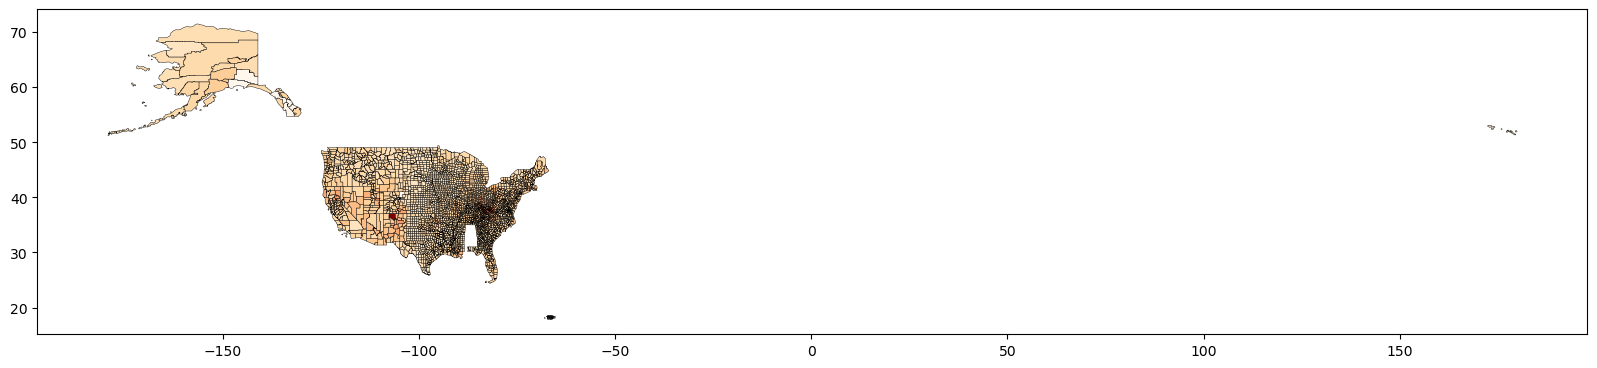

In [78]:
# Plot the data for the Washington DC, Virginia, Maryland, and West Virginia(county level)
ax = overdose_data_withot_al_hi.plot(figsize=(20, 20), column="Narcotic Overdose Mortality Rate 2014", legend=False, cmap='OrRd', edgecolor='black',linewidth=0.3)

# for idx, row in overdose_data.iterrows():
#     centroid = row.geometry.centroid
#     county_name = row.FIPS
#     ax.annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=0.5)

# Display the plot
plt.show()